# Работу выполнил: Махов Михаил Александрович

# Группа: 3822Б1ПР2

# 16. Регуляризация А.Н. Тихонова

Система $(A^{\rm T} A + \alpha E)x = A^{\rm T} b$ называется регуляризованной по отношению к системе $Ax = b$. Параметр $\alpha$ называется параметром регуляризации. Метод регуляризации А.Н.,Тихонова заключается в выборе последовательности $\alpha_k \to 0$ (например, геометрической прогрессии) и решении регуляризованных систем $(A^{\rm T}A + \alpha_k E)x = A^{\rm T} b$ для конечного числа значений $\alpha_k$, и выборе из всех полученных решений того, при котором норма невязки для исходной системы минимальна.

Написать функцию

    x0, discr0, alpha0, x, discr = tikhonov(A, b, alpha),
в которой A и b – матрица и левая часть исходной системы, alpha – вектор, содержащий набор параметров регуляризации, x – матрица, по столбцам которой записаны регуляризованные решения для соответсвующего значения параметра регуляризации, discr – вектор полученных таким образом невязок, x0 – регуляризованное решение (из найденных) с минимальной нормой невязки, discr0, alpha0 – соответствующие ему значения нормы невязки и параметра регуляризации.

Провести эксперимент с плохообусловленными системами из № 8.

Построить график зависимости ошибки и нормы невязки от порядка системы.

Для конкретной системы построить графики зависимости ошибки и нормы невязки от параметра alpha.

Интуиция: Система $(A^{\rm T}A+αE)x=A^{\rm T}b$ при маленьком $α\ge 0$ (например, $α=0$) может быть вырожденной или плохо обусловленной, что приводит к большим ошибкам при численном решении системы. При большом $α$ система хорошо обусловлена, но может слишком сильно отличаться от исходной системы $Ax=b$. Нужно найти компромисс, т.е. «оптимальное» значение $α$: не очень большое и не очень маленькое.

# Ход работы
1) Подключаем нужные библиотеки

In [110]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

2) Описываем функцию **tikhonov**: сначала определяется размер матрицы А (size), создаются пустые матрица x и вектор невязок discr. Далее в цикле проходим по всем значениям вектора параметров регуляризации. На каждой итерации находится решение регуляризованной системы по формуле, которое записывается в соответствующий столбец в x, а также вычисляется норма невязки и записывается в 
вектор discr. После цикла ищется номер параметра регуляризации (min_discr_ind), при котором норма невязки была наименьшая. Записываем в x0, alpha0, discr0 регуляризованное решение, параметр регуляризации, норму невязки соответственно, найденные при параметре регуляризации с индексом min_discr_ind. 

In [134]:
def tikhonov(A, b, alpha):
  size = A.shape[1]
  x = np.empty((size, len(alpha)))
  discr = np.empty(len(alpha))
  
  for i in range(len(alpha)):
    x[:, i] = np.linalg.solve(A.T.dot(A) + alpha[i] * np.eye(size), A.T.dot(b))
    discr[i] = np.linalg.norm(A.dot(x[:, i]) - b)

  min_discr_ind = np.argmin(discr)
  x0 = x[:, min_discr_ind]
  alpha0 = alpha[min_discr_ind]
  discr0 = discr[min_discr_ind]

  return x0, discr0, alpha0, x, discr

3) Возьмем две очень похожие плохо обусловленные системы:

A1 = (1, 2), (3, 6.01), b1 = (3, 5)

A2 = (1, 2.01), (3, 6), b2 = (3, 5)

В таблице выведены результаты применения регуляризации. Чем больше альфа - тем ближе решения двух систем.

In [133]:
A_1 = np.array([[1, 2], [3, 6.01]])
b_1 = np.array([3, 5])
A_2 = np.array([[1, 2.01], [3, 6]])
b_2 = np.array([3, 5])
alpha = np.array([0, 0.001, 0.1, 10, 1000])
x0, discr0, alpha0, x_1, discr = tikhonov(A_1, b_1, alpha)
x0, discr0, alpha0, x_2, discr = tikhonov(A_2, b_2, alpha)
data = {"Значение alpha": alpha, 
        "Решение первой системы": [x_1[:, 0], x_1[:, 1], x_1[:, 2], x_1[:, 3], x_1[:, 4]], 
        "Решение второй системы": [x_2[:, 0], x_2[:, 1], x_2[:, 2], x_2[:, 3], x_2[:, 4]]}
table = pd.DataFrame(data)
table.index += 1
table

,Значение alpha,Решение первой системы,Решение второй системы
1,0.000,"[803.0000006157521, -400.0000003074149]","[-264.99999997934725, 133.33333332301214]"
2,0.001,"[1.9573446220853148, -0.07865219997380093]","[-4.328528437742948, 3.062949170708008]"
3,0.100,"[0.37440438381479185, 0.7098609946815079]","[0.31137149021617916, 0.7423862043386603]"
4,10.000,"[0.2995342157557593, 0.5995664345923519]","[0.2994019505934274, 0.6002979004563445]"
5,1000.000,"[0.017140973016596773, 0.03432936860894964]","[0.017141975325106366, 0.03431308953735979]"


4) Возьмем сто систем с размерами от 2 до 101 и построим графики зависимости ошибки и нормы невязки от порядка системы. Графики получаются почти одинаковыми


Text(0.5, 0, 'Порядок системы')

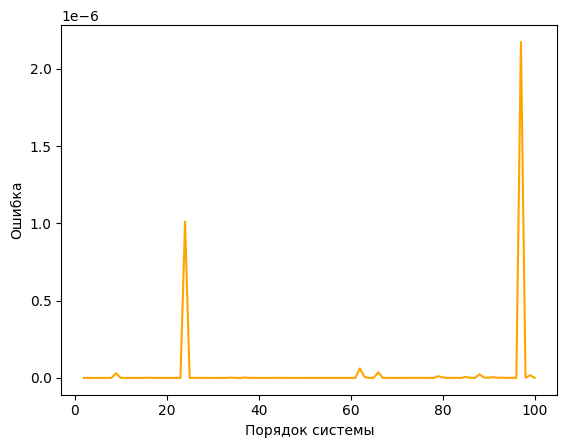

In [172]:
size_list = np.arange(2, 101)
error_list = np.zeros(len(size_list))
discr_list = np.zeros(len(size_list))

for i in range(len(size_list)):
  A = np.random.randint(1000, size=(size_list[i], size_list[i]))
  b = np.random.randint(1000, size=(size_list[i]))
  alpha = np.array([0, 0.001, 0.1, 10, 1000])
  x0, discr0, alpha0, x, discr = tikhonov(A, b, alpha)
  error_list[i] = np.linalg.norm(x0 - np.linalg.solve(A, b))
  discr_list[i] = discr0

plt.plot(size_list, error_list, c='orange')
plt.ylabel('Ошибка')
plt.xlabel('Порядок системы')


Text(0.5, 0, 'Порядок системы')

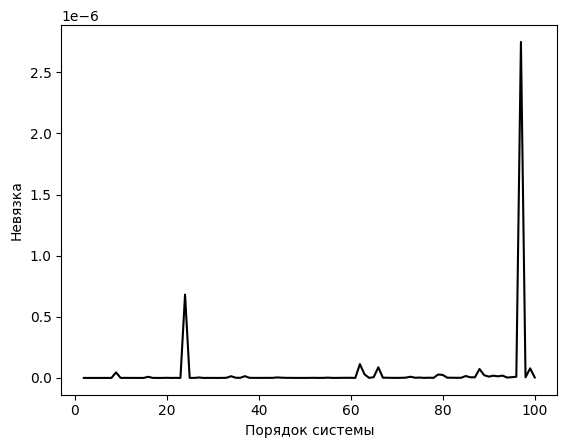

In [173]:
plt.plot(size_list, discr_list, c='black')
plt.ylabel('Невязка')
plt.xlabel('Порядок системы')

5) Возьмем первую систему из п.3 и построим для нее графики зависимости ошибки и нормы невязки от параметра alpha. Сам параметр alpha будет иметь значения от 0.1 до 1

Text(0.5, 0, 'Alpha')

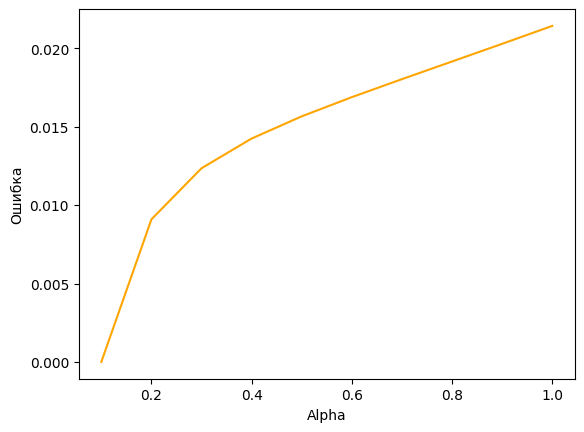

In [184]:
A = np.array([[1, 2], [3, 6.01]])
b = np.array([3, 5])
#alpha = np.array([0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000])
alpha = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
error_list = np.zeros(len(alpha))
discr_list = np.zeros(len(alpha))
x0, discr0, alpha0, x, discr = tikhonov(A, b, alpha)

for i in range(len(alpha)):
  error_list[i] = np.linalg.norm(x0 - x[:, i])
  discr_list[i] = discr[i]

plt.plot(alpha, error_list, c='orange')
plt.ylabel('Ошибка')
plt.xlabel('Alpha')

Text(0.5, 0, 'Alpha')

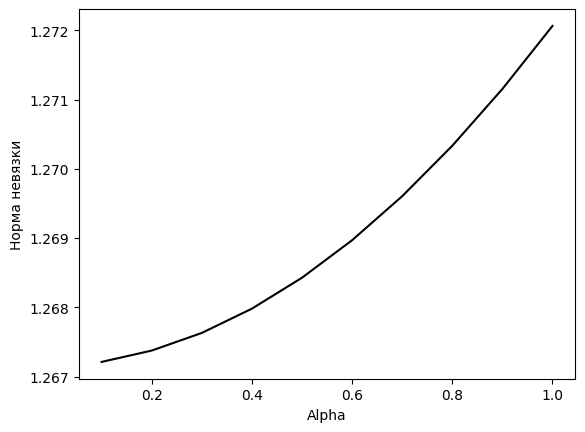

In [185]:
plt.plot(alpha, discr_list, c='black')
plt.ylabel('Норма невязки')
plt.xlabel('Alpha')